In [1]:
%load_ext autoreload
%autoreload 2

import spacy
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import re
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import json

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from analysis_code.analyze_corpus import *

In [2]:
plt.rcParams.update({'font.size': 11})
barwidth = 0.8

In [28]:
example = '/home/dashi/lulu/corpus/Reuters21578/examples/sample.sgm'
exampleOut = '/home/dashi/lulu/corpus/Reuters21578/examples/out.sgm'

'''converted articles'''
articleData = '/home/dashi/lulu/corpus/Reuters21578/reuter-article.txt'
articleDir = '/home/dashi/lulu/corpus/Reuters21578/Reuters-articles/'

'''sgm '''
dataDir = '/home/dashi/lulu/corpus/Reuters21578/Reuters-data/'
breakDir = '/home/dashi/lulu/corpus/Reuters21578/Reuters21578-break/'

'''converted articles so that each txt per article''' 
sampleDir = '/home/dashi/lulu/corpus/Reuters21578/sample/'
articleBreakDir = '/home/dashi/lulu/corpus/Reuters21578/Reuters-artbreak/'

# stat emo file
statEmosF =  '/home/dashi/lulu/com_metrics_chatbot/code/analysis/reuter_statEmosF.txt' 

In [4]:
nlp = spacy.load('en_core_web_md')
emos = loadEmotionWords('/home/dashi/lulu/corpus/NRC-Emotion-Lexicon-v0.92/Generated-EmotionWords.txt')

In [ ]:
parsed_text = 'This is an awesome sentence. Where is the cat?'
doc = nlp(parsed_text)
counter = analyzePOS(doc)
print(counter)

In [ ]:
filename = '/home/luluvyd/examples/data/example_out.json'
with open(filename, 'w+') as f:
    json.dump(counter, f)

In [ ]:
parsed_text = 'This is an awesome sentence. Where is the cat?'
doc = nlp(parsed_text)
counter = analyzeSentence(doc)
print(counter)

In [ ]:
parsed_text = 'This is an awesome sentence. Where is the cat?'
doc = nlp(parsed_text)
counter = analyzeWordLength(doc)
print(counter)

In [ ]:
parsed_text = 'This is an awesome sentence. Where is the cat?'
doc = nlp(parsed_text)
counter = analyzePunctuation(doc)
print(counter)

In [ ]:
parsed_text = 'This is an awesome sentence. Where is the cat?'
doc = nlp(parsed_text)
counterPos = analyzePOS(doc)
counterPunc = analyzePunctuation(doc)
print(sumCounter(counterPunc) / sumCounter(counterPos)) 

In [ ]:
parsed_text = 'This is an awesome sentence. My is better. Their food is worse. It is it. Who is good? What is in him?'
doc = nlp(parsed_text)
counterPunc = analyzePronoun(doc)
print(counterPunc) 

In [ ]:
parsed_text = 'This is an awesome sentence. My is better. Their food is worse. It is it. Who is good? What is in him?'
doc = nlp(parsed_text)
counterPRP = analyzePronounPRP(doc)
print(counterPRP) 

In [ ]:
parsed_text = 'This is an awesome sentence. My is better. Their food is worse. It is it. Who is good? What is in him?'
doc = nlp(parsed_text)
counterPRPD = analyzePronounPRPD(doc)
print(counterPRPD) 

In [ ]:
parsed_text = 'This is an awesome sentence. My is better. Their food is worse. It is it. Who is good? What is in him?'
doc = nlp(parsed_text)
counterPWP = analyzePronounWP(doc)
print(counterPWP) 

In [ ]:
parsed_text = 'This is an awesome sentence. My is better. Their food is worse. It is it. Who is good? What is in him?'
doc = nlp(parsed_text)
counterPWPD = analyzePronounWPD(doc)
print(counterPWPD) 

In [ ]:
parsed_text = 'This is an awesome sentence. My is better. Their food is worse. It is it. Who is good? What is in him?'
doc = nlp(parsed_text)
counterPCat = analyzePronounCategories(doc)
print(counterPCat) 

In [ ]:
parsed_text = 'This is an awesome sentence. I am running. It rains.'
doc = nlp(parsed_text)
counterVerb = analyzeVerb(doc)
print(counterVerb) 

In [ ]:
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
if __name__ == "__main__":  
    with open(filename, 'r') as f:
        text = f.read()
        nlp = spacy.load('en_core_web_md')
        doc = nlp(text)
        counter = analyzePOS(doc)
        
        plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')

        labels, values = rankCounter(counter)
        indexes = np.arange(len(labels))
        width = 1
        plt.bar(indexes, values, width)
        plt.xticks(indexes + width * 0.5, labels)
        plt.show()
    f.close()
                


In [ ]:
'''
POS histogram
error: doc input string cannot succeed 1 million characters
problem: iterating over text is too slow, parallelize
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counter = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counter = analyzePOS(doc)
        i += 1
        
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
'''
Sentence length histogram
error: doc input string cannot succeed 1 million characters
problem: non-edited opinion text can have long and publish unaccepted sentence structures
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counter = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counter += analyzeSentence(doc) 
        i += 1
        
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
'''
Word lengths histogram 
error: doc input string cannot succeed 1 million characters
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counterWord = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterWord += analyzeWordLength(doc) 
        i += 1

mean = sum([k*v for k, v in counterWord.items()]) / sumCounter(counterWord)
print('average word lengths is : ' + str(mean))

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterWord)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

counter

In [ ]:
'''
Punctuation histogram
Percentage of punctuation out of total number of words
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counterPun = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPun += analyzePunctuation(doc) 
        i += 1
pert = sumCounter(counterPun) / sumCounter(counterWord)*100
print('percent of puncutation symbol is : ' + str(pert))
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPun)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
'''
Punctuation histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterPron = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPron += analyzePronoun(doc) 
        i += 1
    
print(counterPron)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPron)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
'''
Pronoun, personal histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterPronPRP = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPronPRP += analyzePronounPRP(doc) 
        i += 1
    
print(counterPron)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPronPRP)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
'''
pronoun, possessive histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterPronPRPD = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPronPRPD += analyzePronounPRPD(doc) 
        i += 1
    
print(counterPronPRPD)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPronPRPD)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
'''
pronoun, possessive histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterPronWP = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPronWP += analyzePronounWP(doc) 
        i += 1
    
print(counterPronWP)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPronWP)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
'''
wh-pronoun, possessive histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterPronWPD = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPronWPD += analyzePronounWPD(doc) 
        i += 1
    
print(counterPronWPD)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPronWPD)
if labels and values:
    indexes = np.arange(len(labels))
    width = 1
    plt.bar(indexes, values, width)
    plt.xticks(indexes + width * 0.5, labels)
    plt.show()

In [ ]:
'''
4 pronoun categories histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(directory + '*.txt')

counterPronCat = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPronCat += analyzePronounCategories(doc) 
        i += 1
    
print(counterPronCat)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPronCat)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
'''
Verb root words histogram
'''
read_files = glob.glob(directory + '*.txt')

counterVerbRoot = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterVerbRoot += analyzeVerb(doc) 
        i += 1
    
print(counterVerbRoot)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterVerbRoot)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [6]:
'''
Emotion words histogram
'''  
read_files = glob.glob(articleBreakDir + '*.txt')
N = len(read_files)
countersEmos, sizesEmos = docTermFreq(read_files, emos)

19000
19000


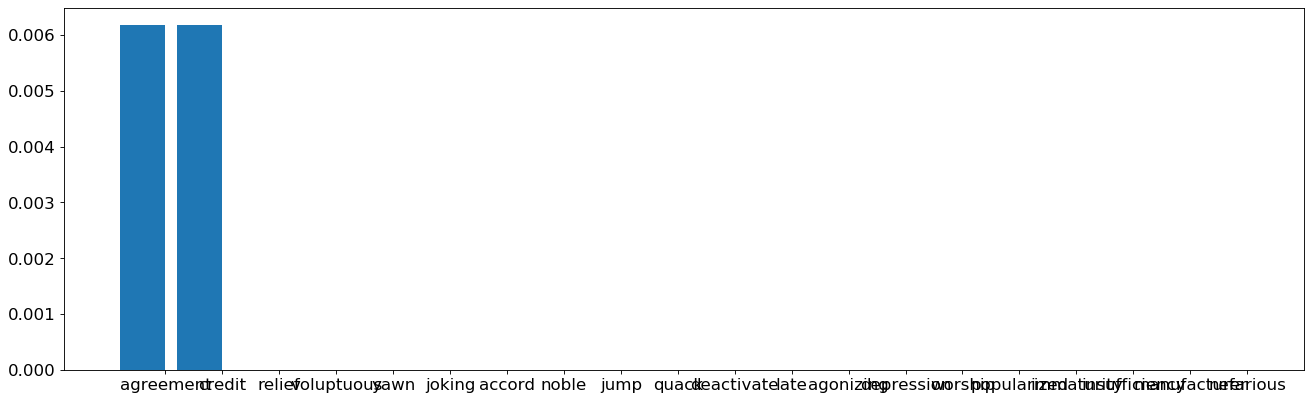

In [7]:
print(len(countersEmos))
print(len(sizesEmos))

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(countersEmos[1])
values = [v*1.0/sizesEmos[1] for v in values]
indexes = np.arange(len(labels)) 
plt.bar(indexes, values, barwidth)
plt.xticks(indexes + barwidth * 0.5, labels)
plt.show()

In [8]:
tfsEmos = termFreq(countersEmos, sizesEmos)
counterEmos, szEmos = docFreq(countersEmos)
idfEmos = invDocFreq(counterEmos, szEmos)
tiEmos = tfIdf(tfsEmos, idfEmos) 

In [15]:
i = 0
totWords = 0

for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        totWords += totalWords(f) 
        if (i % 5000 == 0): 
            print('i : ' + str(i))  
        i += 1  

i : 0
i : 5000
i : 10000
i : 15000


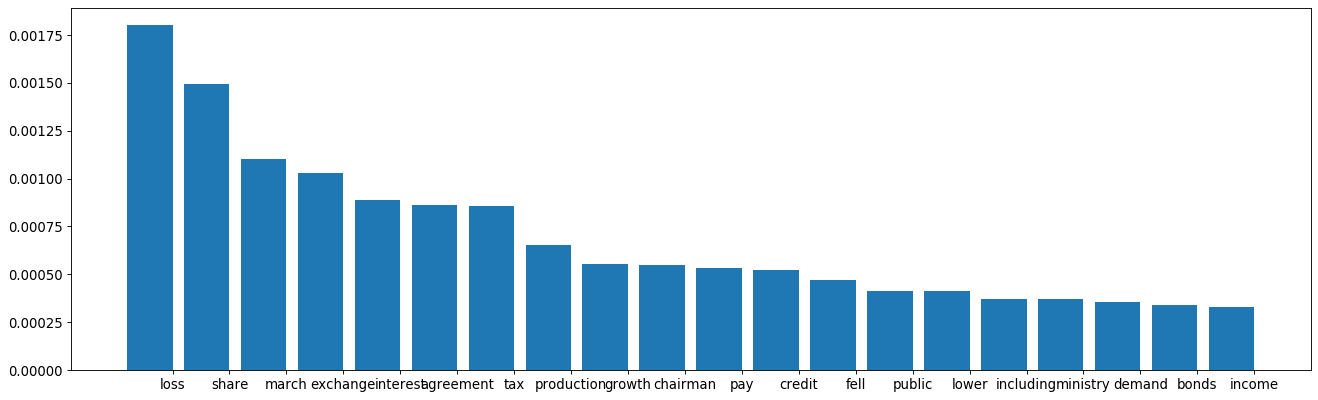

In [17]:
plt.rcParams.update({'font.size': 12})
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterEmos)
values = [v*1.0/totWords for v in values]
indexes = np.arange(len(labels)) 
plt.bar(indexes, values, barwidth)
plt.xticks(indexes + barwidth * 0.5, labels)
plt.savefig('reuter_emos_df.eps', format='eps')
plt.show()

18999


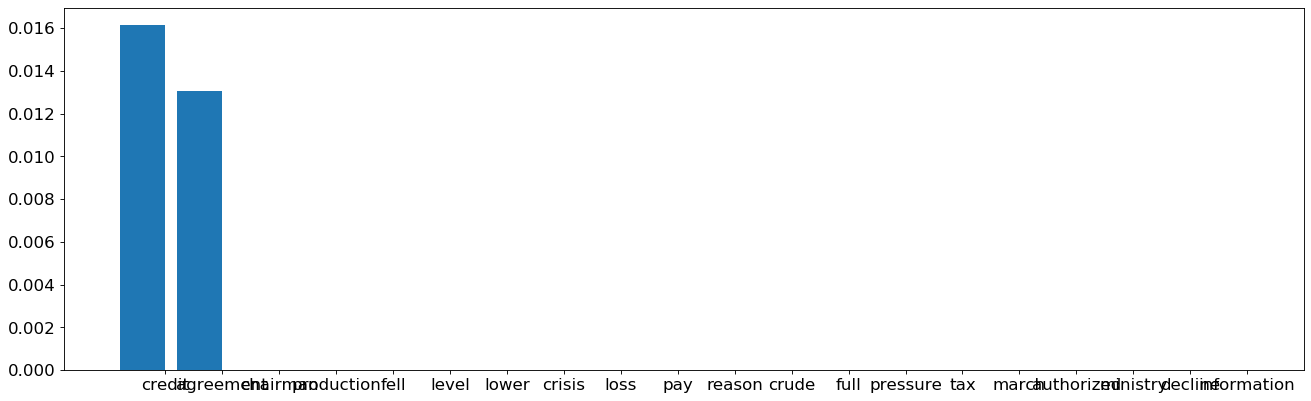

In [9]:
print(len(tiEmos)) 
d = sortByValue(tiEmos[1])
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = list(d.keys())[:20], list(d.values())[:20]
indexes = np.arange(len(labels)) 
plt.bar(indexes, values, barwidth)
plt.xticks(indexes + barwidth * 0.5, labels)
plt.show()

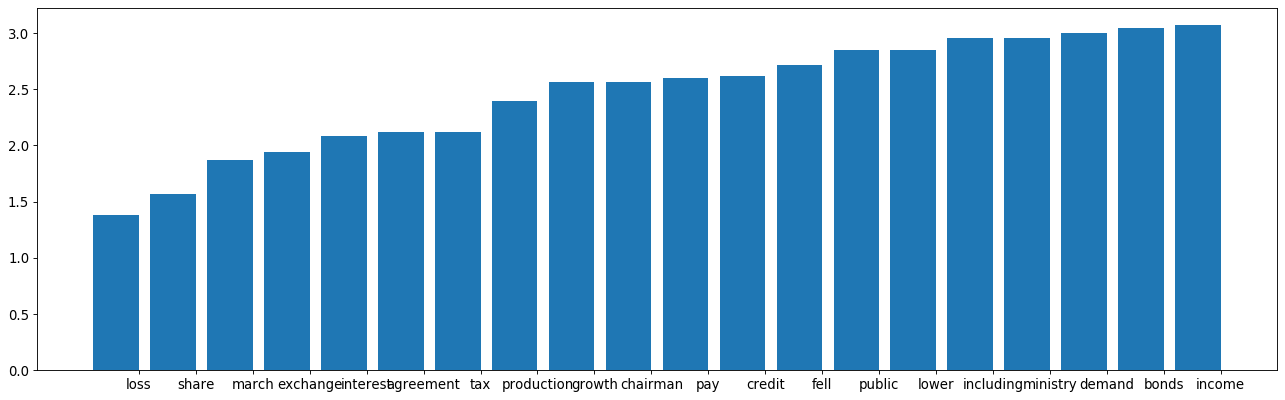

In [18]:
N = len(read_files) 
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
result = {k: v for k, v in sorted(idfEmos.items(), key=lambda item: item[1])}
labels = list(result.keys())[:20]
values = list(result.values())[:20]
indexes = np.arange(len(labels)) 
plt.bar(indexes, values, barwidth)
plt.xticks(indexes + barwidth * 0.5, labels)
plt.savefig('reuter_emos_idf.eps', format='eps')
plt.show()

In [5]:
'''
Verb category histogram
'''
read_files = glob.glob(articleBreakDir + '*.txt')

i = 0
countersAct = []
countersLink = []
countersHelp = [] 
countersHM = []

szAct = []
szLink = []
szHelp = []
szHM = []

for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        a, b, c, d = analyzeVerbs(doc) 
        countersAct.append(a)
        countersLink.append(b) 
        countersHelp.append(c) 
        countersHM.append(d) 
        
        szAct.append(sum(a.values()))
        szLink.append(sum(b.values()))
        szHelp.append(sum(c.values()))
        szHM.append(sum(d.values()))
        
print(sum(np.array(szAct)))
print(sum(np.array(szLink)))
print(sum(np.array(szHelp)))

163259
27212
39942


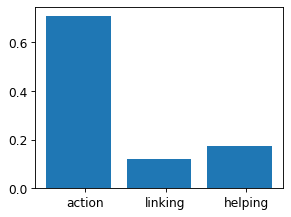

In [6]:
x = np.array([sum(np.array(szAct)), sum(np.array(szLink)), sum(np.array(szHelp))])
# values = x
values = x*1.0/sum(x)
labels = ["action", "linking", "helping"]
indexes = np.arange(len(labels))
plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k') 
plt.bar(indexes, values, barwidth)
plt.xticks(indexes + barwidth * 0.1, labels)
plt.savefig('reuter_verbcat_pc.eps', format='eps')
plt.show()

In [7]:
values

array([0.70854943, 0.11810098, 0.17334959])

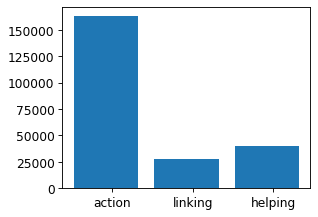

In [8]:
x = np.array([sum(np.array(szAct)), sum(np.array(szLink)), sum(np.array(szHelp))])
values = x
# values = x*1.0/sum(x)
labels = ["action", "linking", "helping"]
indexes = np.arange(len(labels))
plt.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k') 
plt.bar(indexes, values, barwidth)
plt.xticks(indexes + barwidth * 0.1, labels)
plt.savefig('reuter_verbcat_ct.eps', format='eps')
plt.show()

In [9]:
'''
Pronoun histogram
Percentage of punctuation out of total number of words
'''
read_files = glob.glob(articleBreakDir + '*.txt')
counterPron = Counter('') 

for infile in read_files: 
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counterPron += analyzePronoun(doc)  

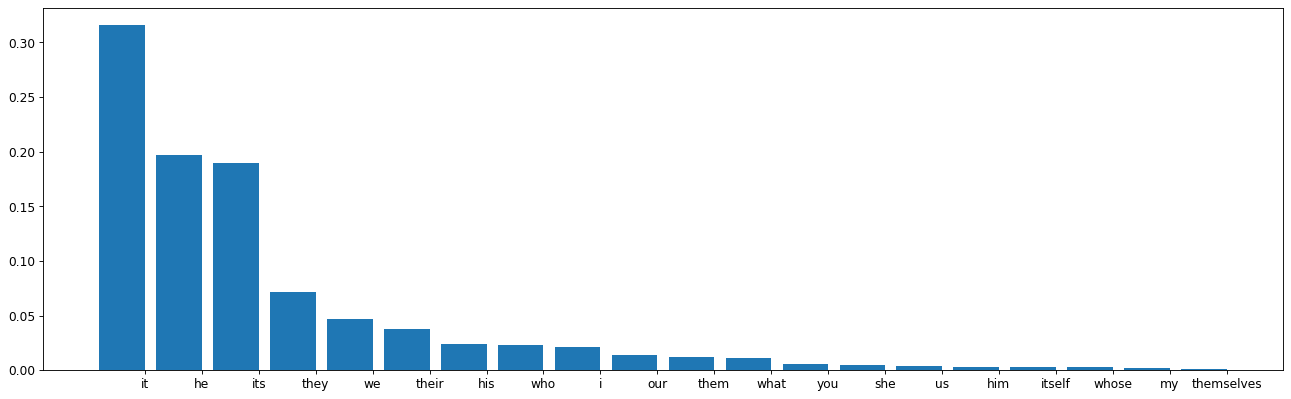

In [10]:
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterPron)
values = np.array(values)*1.0/sum(counterPron.values())
indexes = np.arange(len(labels)) 
plt.bar(indexes, values, barwidth)
plt.xticks(indexes + barwidth * 0.5, labels)
plt.savefig('reuter_pron_df.eps', format='eps')
plt.show()

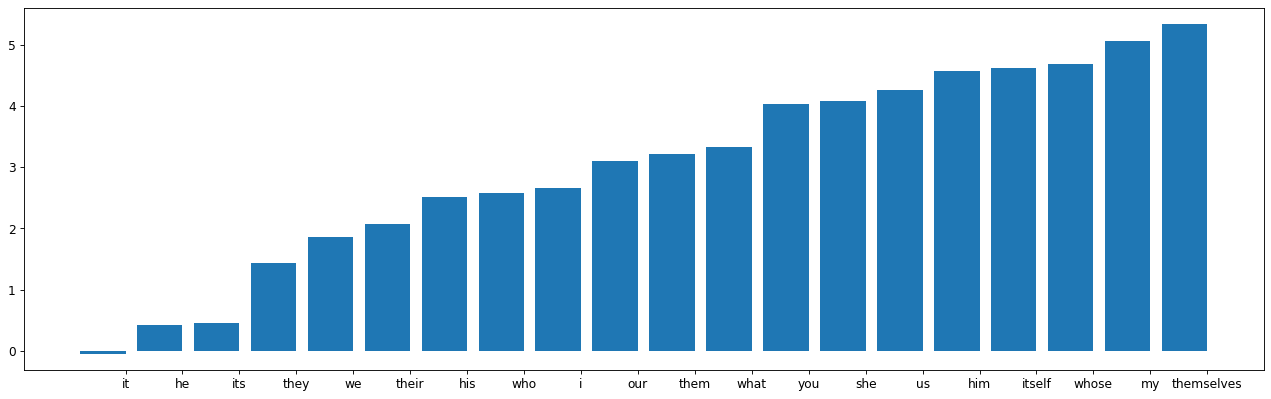

In [11]:
N = len(read_files)
counterPronIdf = invDocFreq(counterPron, N)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
result = {k: v for k, v in sorted(counterPronIdf.items(), key=lambda item: item[1])}
labels = list(result.keys())[:20]
values = list(result.values())[:20]
indexes = np.arange(len(labels)) 
plt.bar(indexes, values, barwidth)
plt.xticks(indexes + barwidth * 0.5, labels)
plt.savefig('reuter_pron_idf.eps', format='eps')
plt.show()

In [ ]:
'''
Score emotion words histogram
'''
counterEmos = Counter('')
i = 0

with open(articleData, 'r', errors='replace') as f:
    text = f.read()
    doc = nlp(text)
    counterEmos += scoreEmos(emos) 
    i += 1
    
print(counterEmos)
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counterEmos)
indexes = np.arange(len(labels)) 
plt.bar(indexes, values, barwidth)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
'''
Corpus : break-up cmu movie view file
'''
scores = []
with open(filename, 'r', errors='replace') as f:
    r = scoreArticle(f, emos)
    scores += r

In [12]:
'''
Emotion words histogram
'''
wordSize = []
i = 0

for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        wordSize.append(len(text.split()))

In [13]:
'''
Emotion words histogram
'''
countersEmos = []
i = 0

for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        countersEmos.append(analyzeEmotionWords(doc, emos))
        if (i % 5000 == 0): 
            print('i : ' + str(i))  
        i += 1

i : 0
i : 5000
i : 10000
i : 15000


In [14]:
emosScore = []

for counter in countersEmos: 
    emosScore.append(sum(counter.values()))
 
emosScore = np.array(emosScore)

In [15]:
import pandas as pd
import seaborn as sns 
from scipy import stats

In [16]:
stats.describe(emosScore) 

DescribeResult(nobs=19000, minmax=(0, 57), mean=4.582105263157895, variance=28.994574229668597, skewness=2.5982495208131424, kurtosis=9.677858064759691)

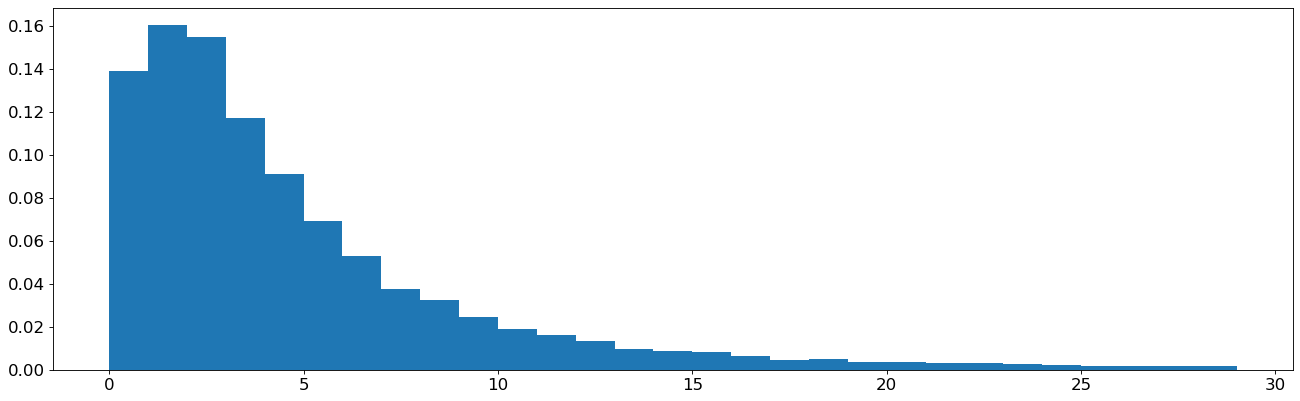

In [24]:
binwidth = 2
plt.rcParams.update({'font.size': 15})
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(emosScore, density=True, bins=range(0, 30, 1))  # `density=False` would make counts
plt.savefig('reuter_emos_scores.eps', format='eps')
plt.show()

In [25]:
emosScoreF = [] 
for i in range(len(emosScore)):
    emosScoreF.append(emosScore[i]*1.0/wordSize[i])

In [26]:
stats.describe(emosScoreF)

DescribeResult(nobs=19000, minmax=(0.0, 0.2857142857142857), mean=0.03931886619324331, variance=0.0011127695372669284, skewness=1.8074078804798135, kurtosis=5.5026211021776295)

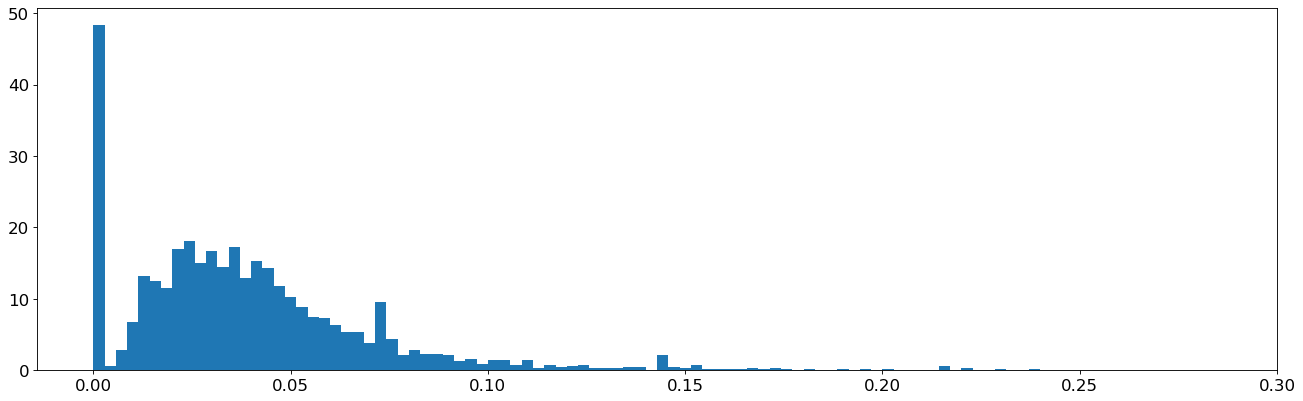

In [27]:
binwidth = 1
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(emosScoreF, density=True, bins=100)  # `density=False` would make counts
plt.savefig('reuter_emos_scoresF.eps', format='eps')
plt.show()

In [29]:
np.savetxt(statEmosF, emosScoreF, fmt="%f")